In [20]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [21]:
import math
import torch

from atomics import Linear, ReLU

from tqdm.auto import trange

In [22]:
init_lr_list = 2.0**np.arange(-4,4)
width_list = [64, 128, 256, 512, 1024, 2048]
depth = 10

batch_size = 400
steps = 1000
beta = 0.9
wd = 0.01

x = torch.randn(batch_size, 8).cuda()
y = torch.randn(batch_size, 8).cuda()

results = {}

for width in width_list:
    results[width] = []
    
    # block = (1-1/depth) * I() + 1/depth * Linear(width, width) @ (math.sqrt(2) * ReLU())
    block = Linear(width, width) @ (math.sqrt(2) * ReLU())
    net = Linear(8,width) @ block ** depth @ Linear(width, 8)
    
    for init_lr in init_lr_list:
    
        net.initialize()
        
        net = net.cuda()
        
        for i in (pbar := trange(steps)):
            out = net.forward(x)
            loss = (out-y).square().mean()
            loss.backward()
        
            net.update(init_lr * (1 - i / steps), beta, wd)
            net.zero_grad()
                
            pbar.set_description(f"loss: {loss.item():.4f}")
    
        results[width].append(loss.item())

[0.0625 0.125  0.25   0.5    1.     2.     4.     8.    ]


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

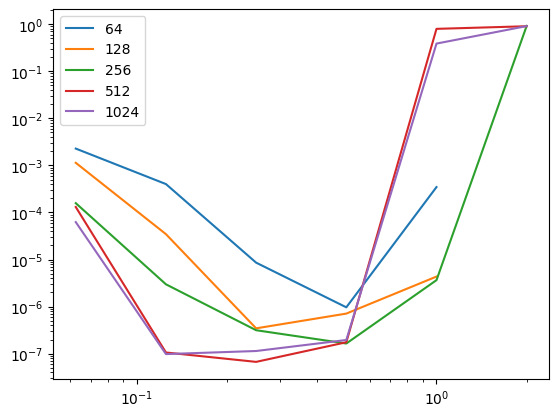

In [23]:
for width in width_list:
    plt.plot(init_lr_list, results[width], label=width)
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.show()